## What is Time series analysis and how it can be solve?
Ans - Time series data is an important source for information and strategy used in various businesses.From a conventional finance industry to education industry, they play a major role in understanding a lot of details on specific factors with respect to time.
      
Time series forecasting is basically the machine learning modeling for Time Series data (years, days,
hours…etc.)for predicting future values using Time Series modeling
            
You read this [click here](https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)
and also for watch [click here]( https://youtu.be/wNB8AgZPFLU)

In [1]:
#load important libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import datetime
%matplotlib inline

In [2]:
#load datasets
data = pd.read_csv('AirPassengers.csv')

In [3]:
#view top 5 data
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
#dtype about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month         144 non-null object
Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


Here data's dtype is in object form not is time series form.so, we change first dtype in time series form.

In [5]:
#change dtype into time series form
data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month')

In [6]:
data.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [7]:
ts = data.Passengers

In [8]:
ts.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: Passengers, dtype: int64

In [9]:
ts.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64

In [10]:
ts['1950']

Month
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: Passengers, dtype: int64

## Stationary
This is a vary important concept in time series analysis.Becouse if data is stationary then you can apply time series analysis otherwise data is non-stationary you can't apply time series analysis.
#### How to check data is stationary or not [click here](https://machinelearningmastery.com/time-series-data-stationary-python/)

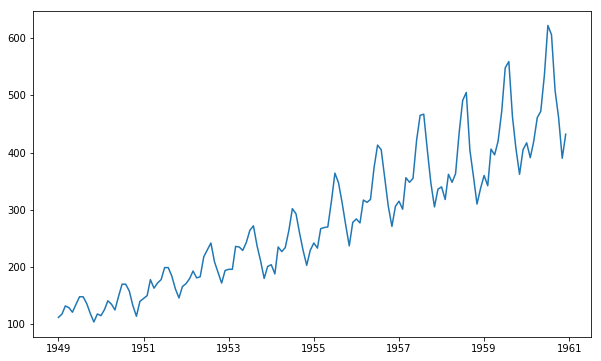

In [11]:
# firstly plot original data to check stationary time series or not
plt.figure(figsize=(10, 6))
plt.plot(ts)
plt.show()

### Here, this datasets is not stationary time series. because plot is increasing in trend
so, firstly change this dataset into stationary time series.

Qns - How to change non-stationary to stationary time series?

Ans - There are three basic criterion for a series to be classified as stationary series :

      1.Mean should be constant according to time.
      2.Variance of the series should not a be a function of time.
      3.Covarience also should not a be a function of time.

In [12]:
#ploting of time series
from statsmodels.tsa.stattools import adfuller
def Stationarity_plot(ts):
    mean = pd.rolling_mean(ts, window=15)
    std = pd.rolling_std(ts, window=15)
    plt.figure(figsize=(12, 7))
    plt.plot(ts, color='blue', label='series')
    plt.plot(mean, color='red', label='mean')
    plt.plot(std, color='green', label='std')
    plt.legend()
    plt.show()
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(ts, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

/home/surya/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  after removing the cwd from sys.path.
/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).std()
  """


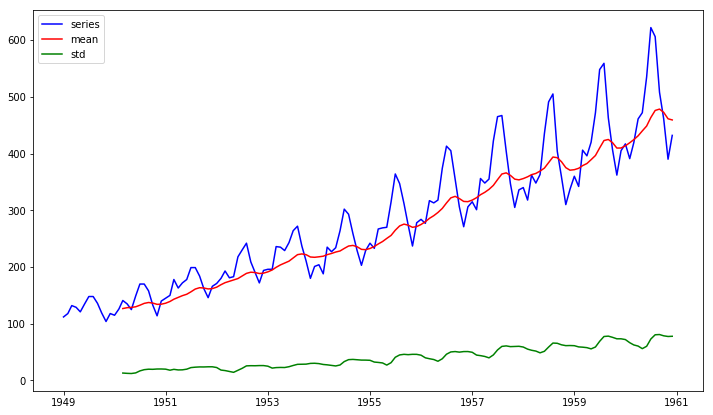

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [13]:
#Let's plot original time series data
Stationarity_plot(ts)

#### This is not stationary 
Here mean is in increasing order and standard deviation is small.

## MAKING THE TIME SERIES STATIONARY
There are 2 major reasons behind non-stationaruty of a Time series:

    1.Trend: non-constant mean
    2.Seasonality: Variation at specific time-frames

The underlying principle is to model or estimate the trend and seasonality in the series and remove those from the series to get a stationary series. Then we can go ahead and apply statistical forecasting to the stationary series.The final step would be to convert the forecasted values into the original scale by applying trend and seasonality constraints back.

#### Let's start working by Trend part,

### Trend
The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc, Lets take a log transform here, 

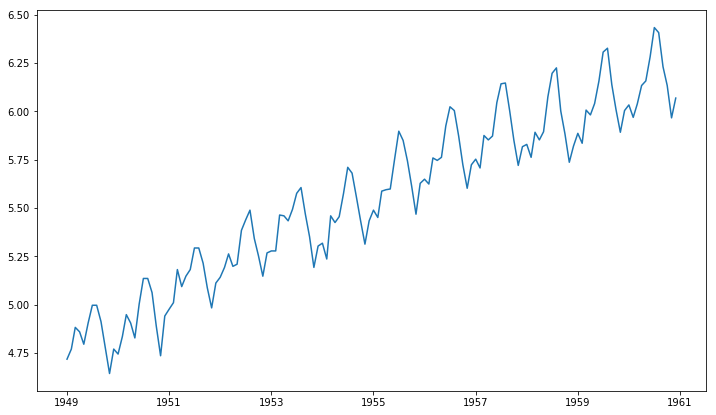

In [14]:
ts_log = np.log(ts)
plt.figure(figsize=(12, 7))
plt.plot(ts_log)

There are some noise in realizing the forword trand. we can use some techniques to estimate or model this trend and then remove it from the series.These are like :-
    
    1.Smoothing: using rolling/moving average
    2.Aggression: by taking the mean for a certain time period (year/month)
    
I will discuss here Smoothing.

### Smoothing:
Here, I will discuss two methods of Smoothing - **Moving average** and **Exponentially weighted moving average**.

#### Moving average:
In this approach, First take x consecutive values and this depends on the frequency if it is 1 year, i.e last 12 values.
Thanks to pandas which have fuction for rolling estimate.

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


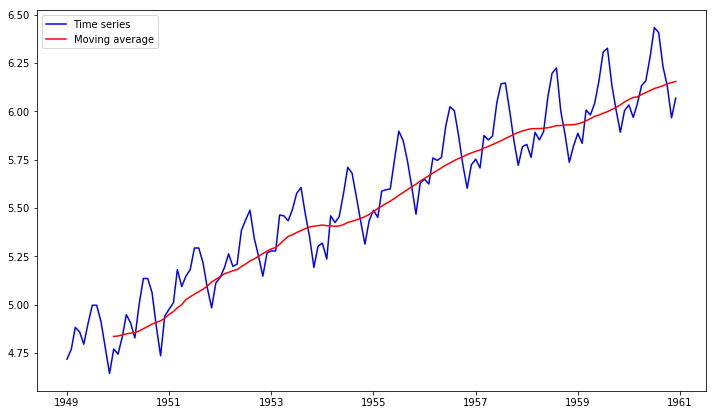

In [31]:
moving_avg = pd.rolling_mean(ts_log, window=12)
plt.figure(figsize=(12, 7))
plt.plot(ts_log, color='blue', label='Time series')
plt.plot(moving_avg, color='red', label='Moving average')
plt.legend()
plt.show()

**Now substract rolling mean value from original series values:-**

In [32]:
moving_avg_diff = moving_avg - ts_log
moving_avg_diff.head()

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
Name: Passengers, dtype: float64

In [33]:
#let's count the null values
moving_avg_diff.isnull().sum()

11

Reason of first 11 values of null is that, we are taking average of last 12 values.Now we are droping these null values for analysis. 

In [34]:
moving_avg_diff.dropna(inplace=True)
moving_avg_diff.head()

Month
1949-12-01    0.065494
1950-01-01    0.093449
1950-02-01    0.007566
1950-03-01   -0.099416
1950-04-01   -0.052142
Name: Passengers, dtype: float64

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  after removing the cwd from sys.path.
/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).std()
  """


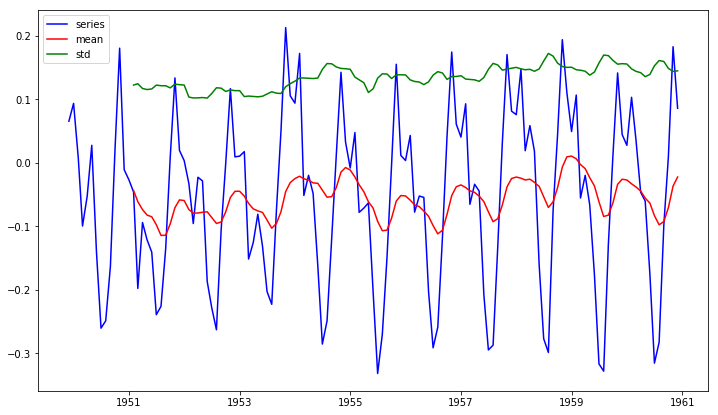

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [35]:
#let's plot the moving average difference
Stationarity_plot(moving_avg_diff)

This is much better like series because:

    1.The rolling values are varying slightly but there is no specific trend.
    2.The test statistics is smaller than the 5 % critical values. That tells us that we are 95% confident that this series is stationary.

#### Exponentially weighted moving average
In this example, we can esily take a time priod like 12 months for year but in complex situations like forecasting a stock price or etc.its a difficult to come up with number.So, we use the exponentially weighted moving average.

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,min_periods=0,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


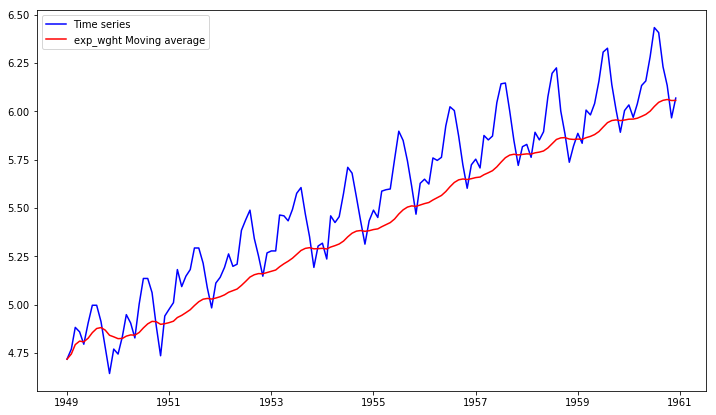

In [36]:
exp_wght = pd.ewma(ts_log, halflife=12)
plt.figure(figsize=(12, 7))
plt.plot(ts_log, color='blue', label='Time series')
plt.plot(exp_wght, color='red', label='exp_wght Moving average')
plt.legend()
plt.show()

Here, the parameter halflife is assumed its depends on the domain.

**Let's check the Stationarity **

/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).mean()
  after removing the cwd from sys.path.
/home/surya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=15,center=False).std()
  """


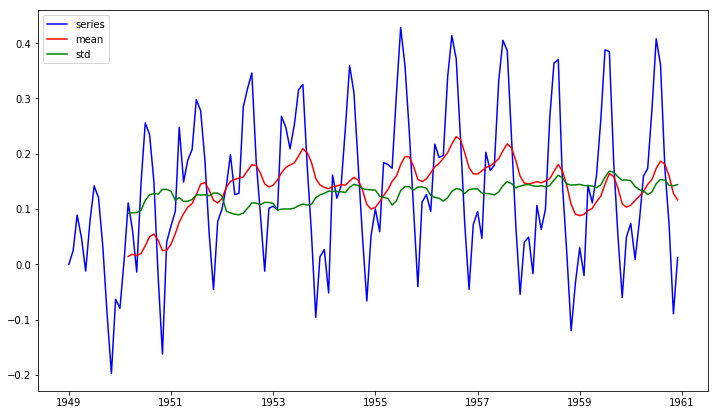

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [37]:
exp_wght_diff = ts_log - exp_wght
Stationarity_plot(exp_wght_diff)

__It is stationarity because :__
    
    1.Rolling values have less variations in mean and standard deviation in magnitude.
    2.The test statistic is smaller than 1% of the critical value. So we can say we are almost 99% confident that this is stationary.